## OLS Regression Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
URL = "https://raw.githubusercontent.com/chandanc5525/BootCamp_CDC/main/Machine%20Learning%20Using%20StatsModels/real_estate_price_size_year.csv"

data = pd.read_csv(URL)

data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [3]:
# Checking Dataset Information
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


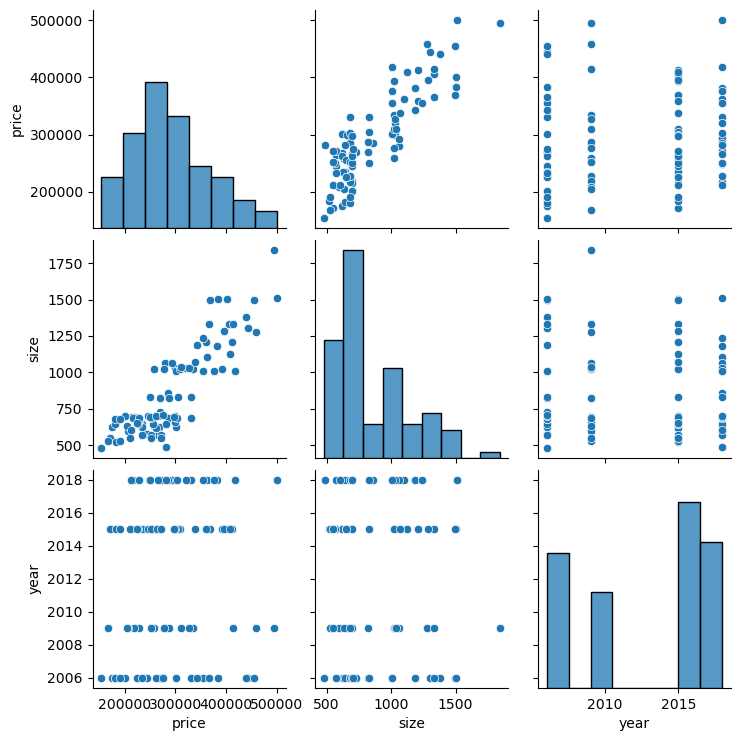

In [4]:
sns.pairplot(data=data)
plt.show()

In [5]:
crosstabulation = pd.crosstab(index = data['price'],columns= data['year']).sum()
crosstabulation

year
2006    24
2009    17
2015    33
2018    26
dtype: int64

In [6]:
data[data['year']==2015]

,price,size,year
0,234314.144,643.09,2015
3,401255.608,1504.75,2015
6,265129.064,570.89,2015
12,215472.104,694.52,2015
20,268125.080,620.71,2015
21,171795.240,549.69,2015
22,412569.472,1207.45,2015
23,183459.488,518.38,2015
27,406852.304,1334.10,2015
28,297760.440,681.07,2015


In [7]:
X = data[['year','size']]
y = data['price']

In [8]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.77e-32
Time:                        03:46:40   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
size         227.7009     12.474     18.254      0.000     202.943     252.458
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model1 = sm.GLSAR(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                          GLSAR   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     166.0
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           6.92e-32
Time:                        03:46:40   Log-Likelihood:                -1180.2
No. Observations:                  99   AIC:                             2366.
Df Residuals:                      96   BIC:                             2374.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.805e+06   1.59e+06     -3.649      0.000   -8.96e+06   -2.65e+06
year        2933.3125    789.863      3.714      0.000    1365.447    4501.178
size         227.3091     12.552     18.109      0.000     202.393     252.225
==============================================================================
Omnibus:                       10.416   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                3.696
Skew:                           0.083   Prob(JB):                        0.158
Kurtosis:                       2.068   Cond. No.                     9.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model2 = sm.QuantReg(y,X).fit(q = 0.95)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.6138
Model:                       QuantReg   Bandwidth:                   5.897e+04
Method:                 Least Squares   Sparsity:                    2.053e+05
Date:                Thu, 07 Dec 2023   No. Observations:                  100
Time:                        03:46:41   Df Residuals:                       97
                                        Df Model:                            2
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.596e+06   2.52e+06     -1.820      0.072   -9.61e+06    4.15e+05
year        2346.5280   1258.451      1.865      0.065    -151.150    4844.206
size         256.0603     16.728     15.308      0.000     222.861     289.260
==============================================================================

The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model3 = sm.WLS(y,X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            WLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.77e-32
Time:                        03:46:41   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
size         227.7009     12.474     18.254      0.000     202.943     252.458
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Verification using Linear Regression Modeling using Sklearn Technique

In [12]:
from sklearn.linear_model import LinearRegression

LinearRegression =  LinearRegression().fit(X,y)

LinearRegression.score(X,y)

0.7764803683276793

In [13]:
score = LinearRegression.score(X,y)
print(f'The Model Score is {score*100} %')

The Model Score is 77.64803683276793 %
